<a href="https://colab.research.google.com/github/gilsonauerswald/Bioinformatic_Projects/blob/main/Python_C2_04_Dimensionality_reduction_Methods_PCA%2C_MDS%2C_NMDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome Back to Python Course 2!**

In the previous lesson, we covered about descriptive statistics and how to get summary statistics of the dataframe.  If you haven't completed these topics, please refer to L03 - Descriptive Statistics in python before practicing the codes for this lesson.

# **Let's Recap!**

Now that we've covered essential concepts in [L04 - Dimensionality reduction Methods - PCA, MDS, NMDS](https://learn.omicslogic.com/Python/python-course-2-introduction-to-data-science-bioml/lesson/04-dimensionality-reduction-methods-pca-mds-nmds), let's take a moment to reinforce what we've learned so far. We'll start with a brief recap of the codes and techniques we've explored in the lesson.

# **Ordination and Dimensionality Reduction**
Multidimensional scaling is an ordination method suited for 0-inflated data like microbiome OTU abundances that reveal proportionate abundance of taxonomic bacterial groups in a sample. To compare 3 methods, let's use the scikit MDS, NMDS and PCA analysis functions. We will then plot the outcome as a scatterplot annotated by sample type.

**Here are some datasets to try:**

Microbiome dataset 1: Gut microbiome from Chow (Normal) vs HFD (High Fat Diet) mice from the publication: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4297748/

dataset 2: acne vs. perioral dermatitis vs. control skin microbiome: https://www.ncbi.nlm.nih.gov/bioproject/PRJNA636582

File2:
https://raw.githubusercontent.com/PineBiotech/omicslogic/master/skin_microbiome_Abundance_table_marked1.txt

# **Lesson Code Breakdown**

## **1. Load data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#load data
df = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/skin_microbiome_Abundance_table_marked1.txt',sep='\t',header=(0))

## **2. Summary statistics of the data**

In [ ]:
df.shape

df.describe()

,id,SRR11961372,SRR11961374,SRR11961376,SRR11961380,SRR11961381,SRR11961383,SRR11961389,SRR11961391,SRR11961392,...,SRR11961413,SRR11961425,SRR11961436,SRR11961446,SRR11961448,SRR11961452,SRR11961453,SRR11961457,SRR11961458,SRR11961459
count,2361,2361,2361,2361,2361,2361,2361,2361,2361,2361,...,2361,2361,2361,2361,2361,2361,2361,2361,2361,2361
unique,2361,40,66,106,81,45,122,104,70,34,...,62,27,23,57,36,37,37,75,55,36
top,OTU_2360,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,2318,2126,2004,2198,2288,1978,2055,2252,2316,...,2250,2318,2339,2277,2311,2324,2309,2233,2263,2316


In [ ]:
#set labels
labels_list = df.loc[[0]]

#Make a list of sample names
sample_names = df.loc[0]
sample_names = list(df)[1:]

#Make unique list of labels
labels = np.unique(labels_list)

#delete "Group" label
labels = np.delete(labels, np.where(labels == 'Group'))

#Remove row "Group" at index 0 from data
data=df.drop([0])

#Remove id from axis
data=data.drop(['id'], axis=1)
data = data.transpose()

#Get list of all labels
flabels = labels_list.loc[0,:].values[1:]

In [ ]:
labels

array(['adult acne', 'none', 'perioral dermatitis'], dtype=object)

## **3. Scale data**

In [ ]:
#scale data
from sklearn.preprocessing import StandardScaler
from sklearn import manifold

scaled = StandardScaler()
scaled.fit(data)
scaled_data = scaled.transform(data)

#import libraries for ploting and scaling
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

#MDS
mds = MDS(2,random_state=0)
XMDS = mds.fit_transform(scaled_data)

#NMDS
nmds = manifold.MDS(n_components=2, random_state=0, metric=False, max_iter=3000)
XNMDS = nmds.fit_transform(scaled_data)


This code snippet performs scaling and multidimensional scaling (MDS) on a dataset for data analysis and visualization. Firstly, the StandardScaler from Scikit-learn is used to standardize the features in the dataset (data) by removing the mean and scaling to unit variance. This ensures that each feature contributes equally to the analysis. Next, classical MDS and non-metric MDS (NMDS) are applied. Classical MDS (MDS) reduces the dimensionality while preserving the distances between points as much as possible. NMDS (nmds), on the other hand, is a variant that focuses on preserving the rank order of distances rather than the distances themselves, making it useful for ordinal data. Both methods are used to project the data into a two-dimensional space for easier visualization and interpretation.

## **4. Plot MDS**

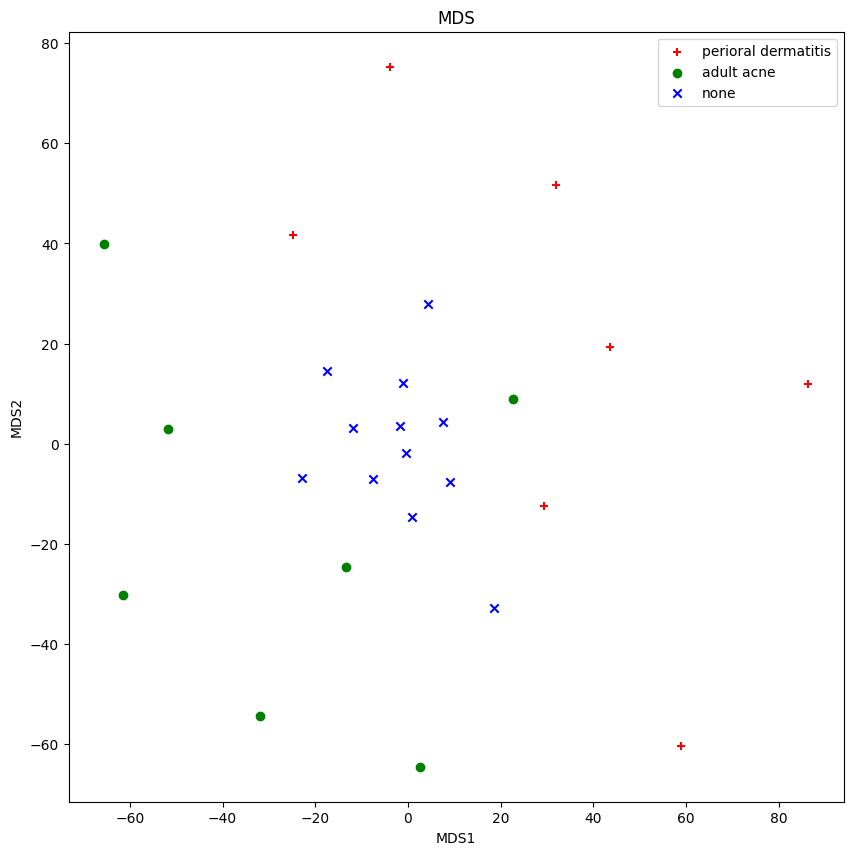

In [ ]:
# plot MDS

MDS1 = 0
MDS2 = 1

plt.figure(figsize=(10, 10))

for i in range(0, XMDS.shape[0]):
  if flabels[i] == 'perioral dermatitis':
    c1 = plt.scatter(XMDS[i,MDS1],XMDS[i,MDS2], c='r', marker='+')
#    plt.text(XMDS[i,MDS1],XMDS[i,MDS2], sample_names[i])
  elif flabels[i] == 'adult acne':
    c2 = plt.scatter(XMDS[i,MDS1],XMDS[i,MDS2], c='g', marker='o')
#    plt.text(XMDS[i,MDS1],XMDS[i,MDS2], sample_names[i])
  elif flabels[i] == 'none':
    c3 = plt.scatter(XMDS[i,MDS1],XMDS[i,MDS2], c='b', marker='x')
#    plt.text(XMDS[i,MDS1],XMDS[i,MDS2], sample_names[i])

#Add labels to MDS scatterplot:
plt.legend([c1, c2, c3],['perioral dermatitis', 'adult acne', 'none'])

plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('MDS')
plt.show()


This code snippet focuses on creating a scatter plot for data points reduced by Multidimensional Scaling (MDS). Each data point in the two-dimensional MDS space represents an observation from the dataset. The observations are distinguished based on their categories: 'perioral dermatitis' (represented as red with '+' markers), 'adult acne' (green with 'o' markers), and 'none' (blue with 'x' markers). The plot includes a legend, which helps in identifying the categories visually. The axes are labeled as 'MDS1' and 'MDS2', denoting the two dimensions of the MDS-transformed space. This visualization is beneficial for analyzing the spatial distribution and potential clustering of different categories in the dataset. The code also includes provisions (currently commented out) to label each point with specific sample names, offering an option for more detailed analysis.

## **5. Plot NMDS**

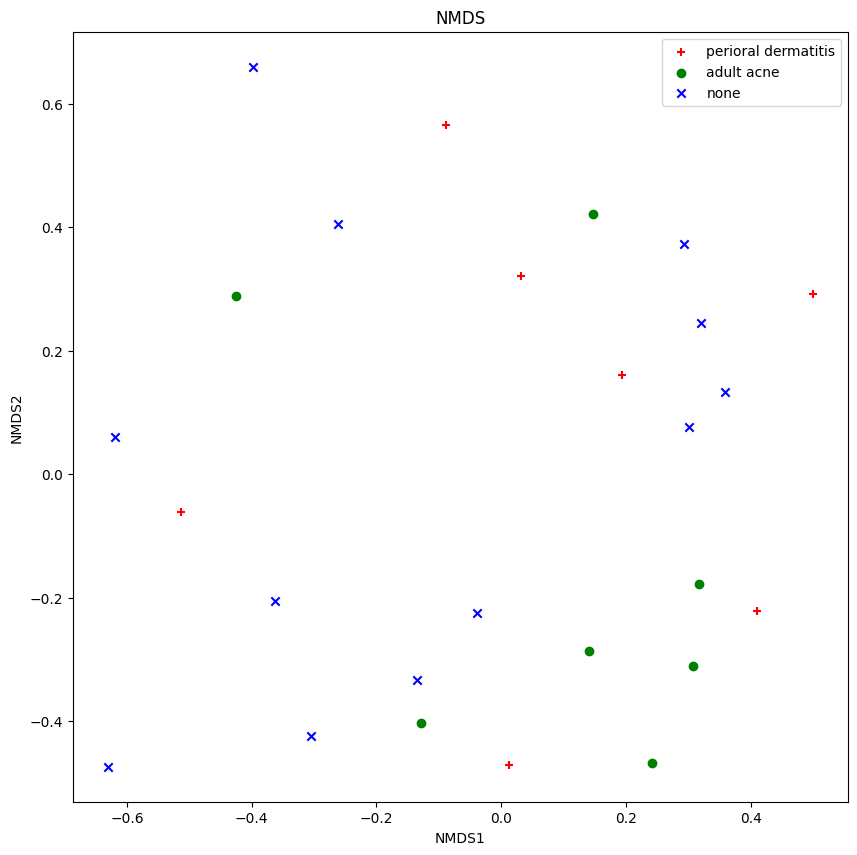

In [ ]:
#NMDS
NMDS1 = 0
NMDS2 = 1

plt.figure(figsize=(10, 10))

for i in range(0, XNMDS.shape[0]):
  if flabels[i] == 'perioral dermatitis':
    c1 = plt.scatter(XNMDS[i,NMDS1],XNMDS[i,NMDS2], c='r', marker='+')
#    plt.text(XNMDS[i,NMDS1],XNMDS[i,NMDS2], sample_names[i])
  elif flabels[i] == 'adult acne':
    c2 = plt.scatter(XNMDS[i,NMDS1],XNMDS[i,NMDS2], c='g', marker='o')
#    plt.text(XNMDS[i,NMDS1],XNMDS[i,NMDS2], sample_names[i])
  elif flabels[i] == 'none':
    c3 = plt.scatter(XNMDS[i,NMDS1],XNMDS[i,NMDS2], c='b', marker='x')
#    plt.text(XNMDS[i,NMDS1],XNMDS[i,NMDS2], sample_names[i])

#Add labels to PCA scatterplot:
plt.legend([c1, c2, c3],['perioral dermatitis', 'adult acne', 'none'])
plt.xlabel('NMDS1')
plt.ylabel('NMDS2')
plt.title('NMDS')
plt.show()

This code snippet creates a scatter plot for data visualized through Non-metric Multidimensional Scaling (NMDS), mapping observations to a two-dimensional space ('NMDS1' and 'NMDS2'). Observations are color-coded and marked differently based on labels like 'perioral dermatitis', 'adult acne', and 'none', aiding in the identification of clusters and patterns. The plot includes a legend for easy categorization and optionally allows for annotating each point with specific names, a feature not currently in use.

## **6. Plot PCA**

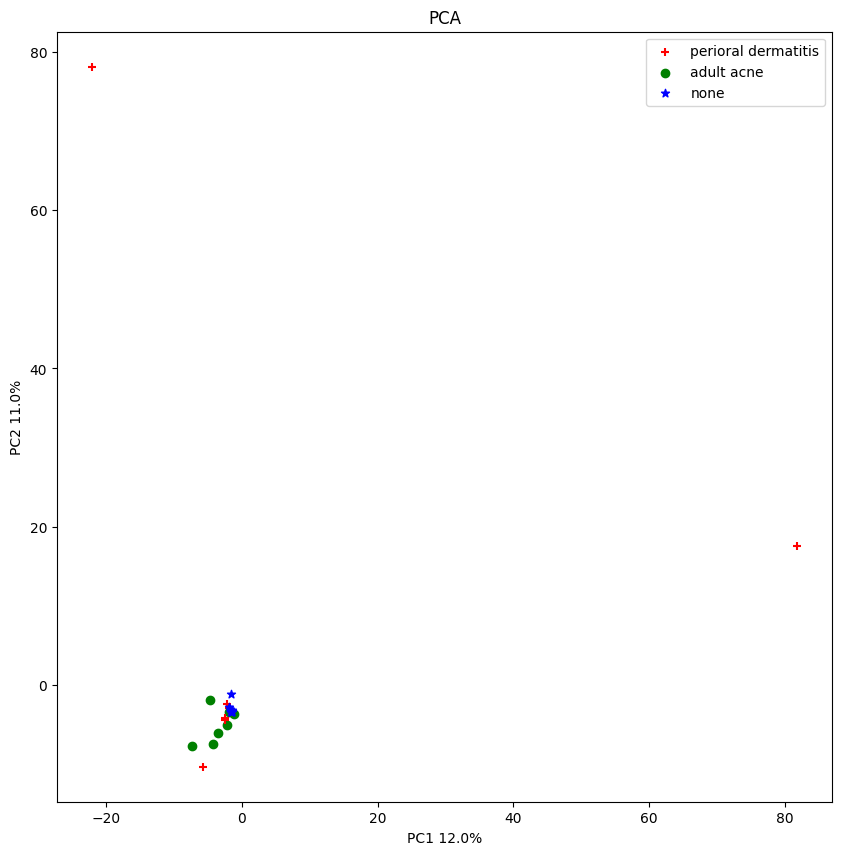

In [ ]:
#Run Principal Component Analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled_data)
xpca = pca.transform(scaled_data)

PC1 = 0
PC2 = 1

plt.figure(figsize=(10, 10))

for i in range(0, xpca.shape[0]):
  if flabels[i] == 'perioral dermatitis':
    c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r', marker='+')
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i])
  elif flabels[i] == 'adult acne':
    c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g', marker='o')
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i])
  elif flabels[i] == 'none':
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b', marker='*')
#    plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i])

#Add labels to PCA scatterplot:
plt.legend([c1, c2, c3],['perioral dermatitis', 'adult acne', 'none'])
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)*100}%')
plt.ylabel(f'PC2 {round(pca.explained_variance_ratio_[1],2)*100}%')
plt.title('PCA')
plt.show()

This code snippet performs Principal Component Analysis (PCA) on a standardized dataset and visualizes the results with a scatter plot. PCA reduces the data to two principal components (PC1 and PC2), capturing the most variance in the dataset. Each point on the plot represents an observation, categorized by labels ('perioral dermatitis', 'adult acne', 'none') and distinguished by color and marker type. The plot includes a legend for label identification. The axes are labeled with the percentage of variance explained by each principal component, providing insights into how much information each component retains. This visualization is useful for understanding the underlying structure of the data, observing how different categories are distributed, and identifying potential clusters. The commented lines suggest an option to label each point with specific sample names for more detailed analysis, though this feature is currently not used.

# **Practice Codes: Try it yourself**

### **Assignment:**
In this assignment, compare PCA with and without scaling to tSNE and MDS using 2 datasets - a low dimensional one and a high dimensional one

tSNE notebook: https://colab.research.google.com/drive/1QBLoCrMVoAWuNb5fXOLRrEGDIO096w6r?usp=sharing


